<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 5</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


# <font color="orange">Worked w/ Brian Arevalo</font>

<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [1]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong>Problem 1: Quadrature </strong></h2>
</div>
Let's looked at different quadrature methods and rules. 


<div style="text-align: center;">
    <h2><strong> Midpoint rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx (b - a) \cdot f\left(\frac{a + b}{2}\right)
$$

<div style="text-align: center;">
    <h2><strong> Trapezoidal Rule  </strong></h2>
</div>

$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]$$

<div style="text-align: center;">
    <h2><strong> Simpson's Rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{3} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right]$$


## A) 
Define a class for all quadrature techniques.

## B) 
Write the above three quadrature rules as class methods **without any pre-defined function from any package** 1)  Midpoint rule 2) Trapezoidal Rule 3) Simpson's Rule. You need to figure out what additional inputs each rule needs. 

In [2]:
class Quad_:
    def __init__(self,fuc,N,a,b):
        '''The class Quad tkaes four inputs: 
         fuc: a function input,
         N: number of grid points,
         a,b: left and right points'''
        self.fuc = fuc
        self.N = N
        self.a = a
        self.b = b
        
    @staticmethod
    def split_interval(a, b, N):
        return [((a + ((b - a) * (n / N))), (a + ((b - a) * ((n + 1) / N)))) for n in range(N)]
    
    @staticmethod
    def midpoint_rule(a, b, fuc):
        return (b - a) * fuc((a + b) / 2)
    
    @staticmethod
    def trapezoidal_rule(a, b, fuc):
        return ((b - a) / 2) * (fuc(a) + fuc(b))
    
    @staticmethod
    def simpsons_rule(a, b, fuc):
        return ((b - a) / 6) * (fuc(a) + 4 * fuc((a + b) / 2) + fuc(b))
    
    def apply_quad(self, quad_fuc):
        b, a, fuc, N = self.b, self.a, self.fuc, self.N
        intervals = self.split_interval(a, b, N)
        return np.sum([quad_fuc(c, d, fuc) for c, d in intervals])
    
    def mid_quad(self):
        return self.apply_quad(self.midpoint_rule)
    
    def trapz_quad(self):
        return self.apply_quad(self.trapezoidal_rule)
    
    def simpson_quad(self):
        return self.apply_quad(self.simpsons_rule)

In [3]:
Quad_(lambda x: x ** 2, 100, 0, 10).simpson_quad()

333.3333333333333

<div style="text-align: center;">
    <h3><strong> Gauss-Legendre Quadrature </strong></h3>
</div>

$$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i)$$


## C)
Since the range is from a to b, let's make a variable change,
$$x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2}$$

Calculate the above condition **analytically**,
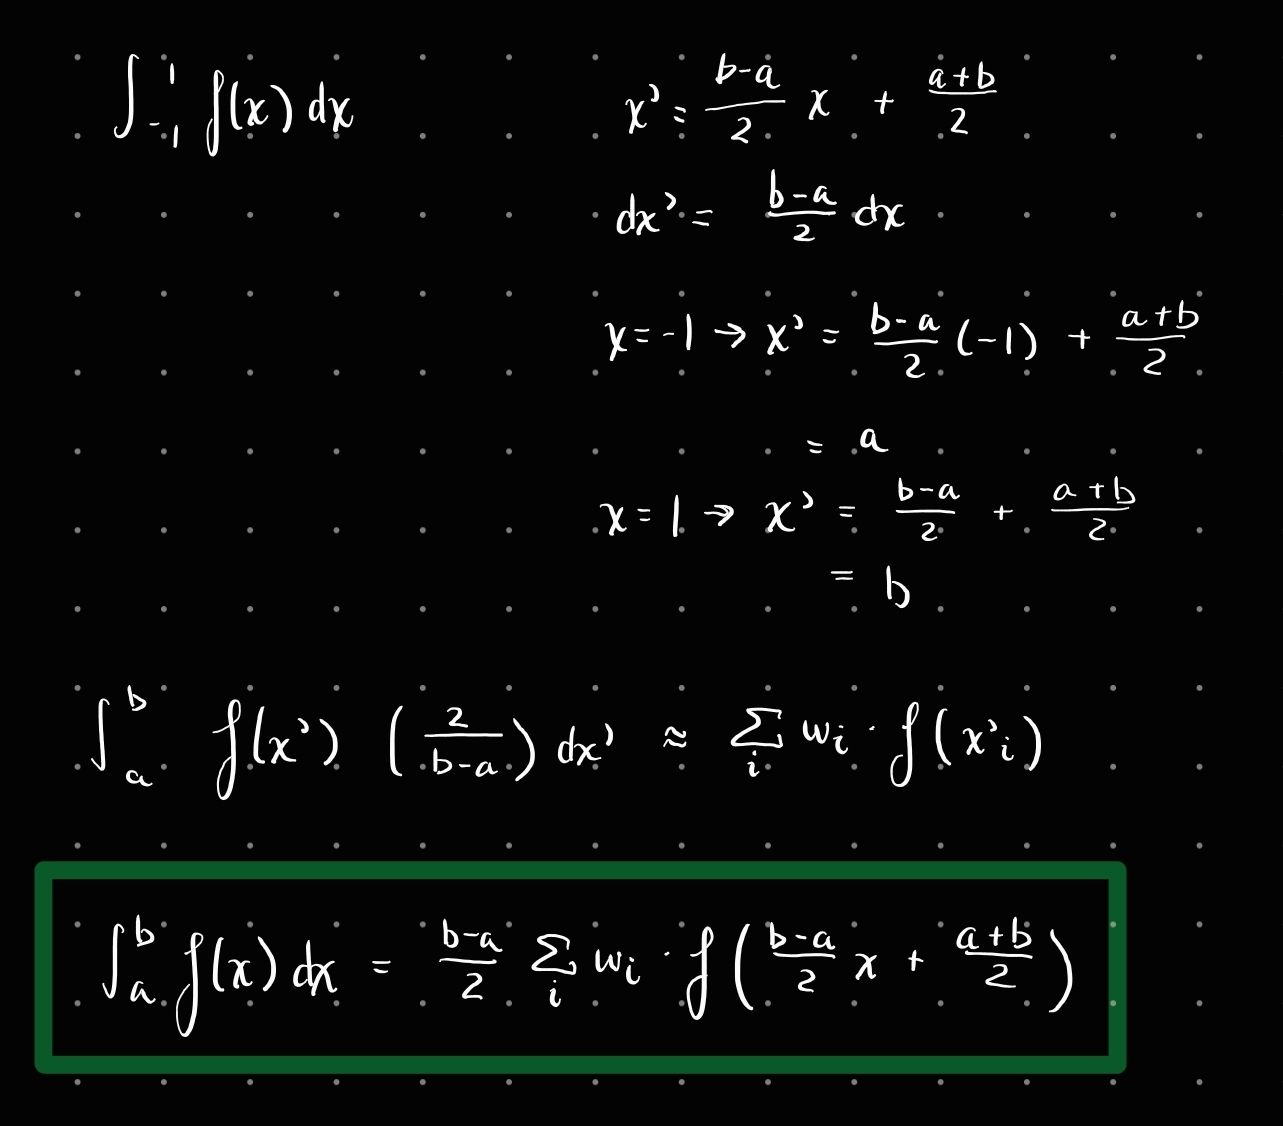
<br> <br> 
You should get something like this: 
$$\int_{a}^b f(x)dx = \frac{b-a}{2} \sum_i w_i f(\frac{b - a}{2} x_i + \frac{a + b}{2})$$

<div style="text-align: center;">
    <h3><strong> Legendre polynomials </strong></h3>
</div>
To find the position and weights of an order M Gauss-Legendre Quadrature, we need to calculate the roots of an order-M Legendre polynomial,
$$(1 - x^2) \frac{d^2 P_M(x)}{dx^2} - 2x \frac{dP_M(x)}{dx} + M(M + 1)P_M(x) = 0,
$$
and the solutions are given by the following:  
$$P_M(x) = \frac{1}{2^n n!} \frac{d^M}{dx^M} \left[(x^2 - 1)^M\right]$$

## D)
Write a child class named Gauss_Quad_ inherits methods from its parent class Quad_. This class takes an additional input, called order. Define a new method that outputs an order-M Legendre polynomial. Plot the following Legendre polynomials: M=[1,2,3,4,5]. 

In [4]:
from numpy.polynomial import Legendre
from scipy.special import roots_legendre 

class Gauss_Quad_(Quad_):
    def __init__(self, fuc, N, a, b, order):
        super().__init__(fuc, N, a, b)
        self.order = order
        
    def legendre_poly(self, x):
        return Legendre.basis(deg=self.order)(x)

    def newton_method_root(self):
        degree = self.order
        # Use Newton's method to find roots
        initial_guesses = np.linspace(-0.9, 0.9, degree)  # Initial guesses for roots
        roots = np.zeros_like(initial_guesses)
        weights = np.zeros_like(initial_guesses)
        derivative = Legendre.basis(deg=self.order).deriv()

        for i, initial_guess in enumerate(initial_guesses):
            # Apply Newton's method
            x_root = initial_guess
            for _ in range(20):  # Perform 20 iterations
                x_root -= self.legendre_poly(x_root) / derivative(x_root)

            roots[i] = x_root
            weights[i] = 2 / ((1 - x_root ** 2) * (derivative(x_root) ** 2))
        
        return roots, weights
    
    def scipy_method_root(self):
        return roots_legendre(self.order)
    
    def gauss_quad(self):
        roots, weights = self.scipy_method_root()
        b, a = self.b, self.a
        c = (b - a) / 2
        d = (a + b) / 2
        return c * np.sum([weight * self.fuc(c * root + d) for (root, weight) in zip(roots, weights)])

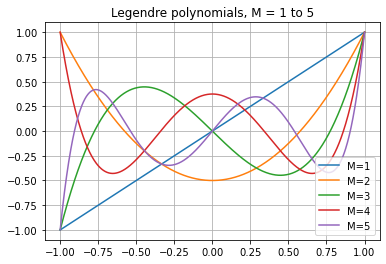

In [5]:
x_space = np.linspace(-1, 1, 1000)

[plt.plot(x_space, Legendre.basis(deg=M)(x_space), label=f'M={M}') for M in [1,2,3,4,5]]
plt.title('Legendre polynomials, M = 1 to 5')
plt.grid()
plt.legend()
plt.show()

<div style="text-align: center;">
    <h3><strong> Newton's Method </strong></h3>
</div>
The positions of an order M Gauss-Legendre Quadrature are calculated by finding roots of an order-M Legendre polynomial,
 <br>  <br> 
$$P_M(x)=0.$$
 <br> 
To numerically find those roots (M of them), we can use the Newton's method: 
 <br> 
$$x_{n+1} = x_{n} - \frac{P_M(x_{n})}{P_M'(x_{n})}.$$
You should be careful on the initial guess.
 <br> 
The weights $w_i$ for Gauss-Legendre Quadrature are calculated as:
$$w_i = \frac{2}{(1 - x_i^2) [P'_M(x_i)]^2}$$
where $P'_M(x_i)$ is the derivative of the Legendre polynomial of degree M evaluated at each root $x_i$. 

## E) 
 Calculate 'M' position and weights for Gaussian quadrature integration between 'a' and 'b' with the Newton's method. Returns a tuple of 2 arrays, the first array is the position of points and second array is the corresponding weights. Output an text file that contains the roots and weights for M=[1,2,3,4,5]. 

In [6]:
with open('newton_method_roots_weights.txt', 'w') as file:
    for m in [1, 2, 3, 4, 5]:
        roots, weights = Gauss_Quad_(_, _, _, _, m).newton_method_root()
        file.write(f'M={m}: Roots: {roots}, Weights: {weights}\n')

## F) 
Using the the following information,
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html
, calculate the roots and weights for M=[1,2,3,4,5]. Do they agree with what you calculate in E)?  

In [7]:
# Add the following to the class in part D). 

for m in [1, 2, 3, 4, 5]:
    roots, weights = roots_legendre(m)
    print(f'M={m}: Roots: {roots}, Weights: {weights}\n')

M=1: Roots: [0.], Weights: [2.]

M=2: Roots: [-0.57735027  0.57735027], Weights: [1. 1.]

M=3: Roots: [-0.77459667  0.          0.77459667], Weights: [0.55555556 0.88888889 0.55555556]

M=4: Roots: [-0.86113631 -0.33998104  0.33998104  0.86113631], Weights: [0.34785485 0.65214515 0.65214515 0.34785485]

M=5: Roots: [-0.90617985 -0.53846931  0.          0.53846931  0.90617985], Weights: [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]



## <font color="orange">Yes, this agrees with what I calculated</font>

## G)
Based on the roots and weights, write a method that output the Gauss-Legendre Quadrature. 

<div style="text-align: center;">
    <h3><strong> Quadrature on test functions </strong></h3>
</div>

In the following question, we want to Use the above four methods, mid_quad, trapz_quad, simpson_quad, gauss_quad, to numerically calculate the quarature on two test functions ($k\geq 0)$

A general k-th order polynomial with a quadrature, 
$$I^{\rm T=A}_{\rm true}=\int_{a}^b dx x^k=\frac{1}{k+1}(b^{k+1}-a^{k+1})$$

A Fermi–Dirac distribution with a quadrature, 
$$I^{\rm T=B}_{\rm true}=\int_{a}^b dx \frac{1}{{1 + e^{-kx}}}=\frac{1}{k}(\log(e^{kb}+1)-\log(e^{ka}+1))$$


Let's define the following: for each order k and N, we have the quadrature value and the relative error,
1) mid_quad: $M(k,N)$,<br><br> $\Delta M(k,N)=2\frac{I_{\rm true}-M(k,N)}{I_{\rm true}+M(k,N)}$,
<br><br><br>
2) trapz_quad: $T(k,N)$,<br><br> $\Delta T(k,N)=2\frac{I_{\rm true}-T(k,N)}{I_{\rm true}+T(k,N)}$,
<br><br><br>
3) simpson_quad: $S(k,N)$,<br><br> $\Delta S(k,N)=2\frac{I_{\rm true}-S(k,N)}{I_{\rm true}+S(k,N)}$,
<br><br><br>
4) gauss_quad: $G(k,N)$,<br><br> $\Delta G(k,N)=2\frac{I_{\rm true}-G(k,N)}{I_{\rm true}+G(k,N)}$,

Let's make the following heatmap for each quadrature method above, 1-4), over the range $[0,1]$: 

y-axis: k from 0 to 10

x-axis: N from 10 to $10^5$

value: relative error




## H) Polynomial





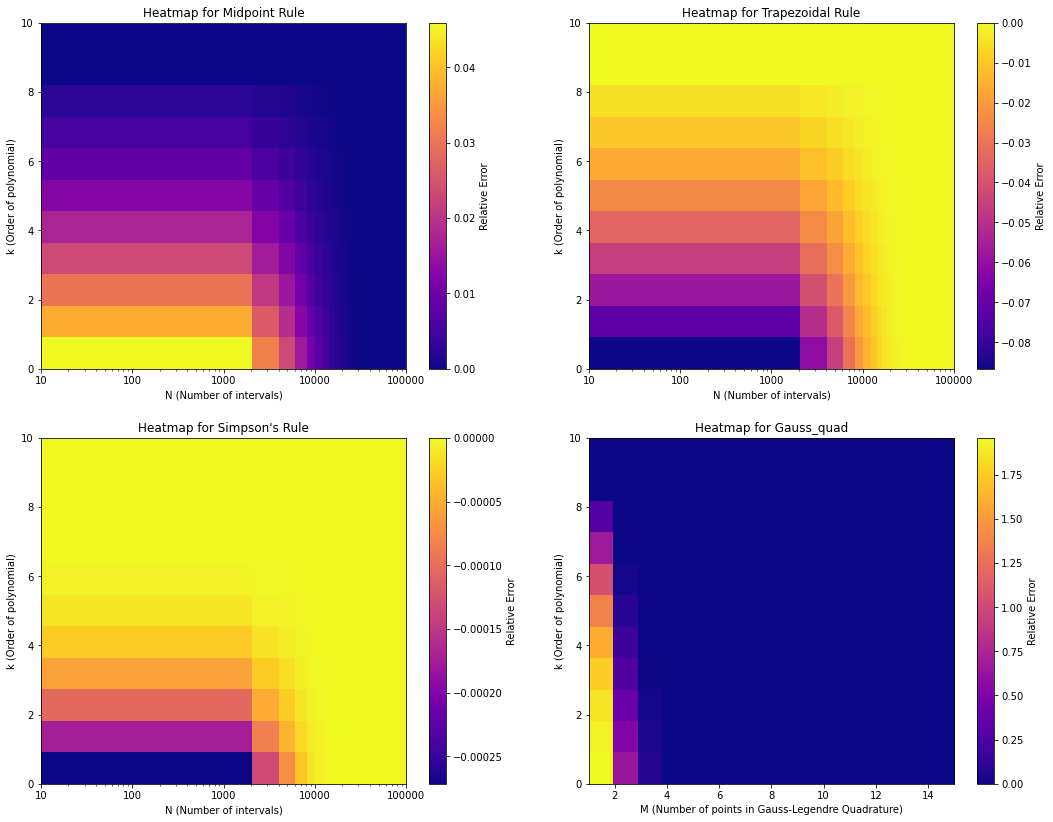

In [8]:
def kth_poly(x, k):
    return x**k

def true(a, b, k):
    return 1/(k+1) * (b**(k + 1) - a**(k+1))

def error(true_value, approx_value):
    return 2 * (true_value - approx_value)/(true_value + approx_value)

k_values = np.arange(0, 11)
N_values = np.logspace(1, 5, num=50, dtype=int)
M_values = np.arange(1, 16)

error_mid = np.zeros((len(k_values), len(N_values)))
error_trap = np.zeros((len(k_values), len(N_values)))
error_simp = np.zeros((len(k_values), len(N_values)))
error_gauss_quad = np.zeros((len(k_values), len(M_values)))

for i, k in enumerate(k_values):
    for j, N in enumerate(N_values):
        function_integrate = lambda x: kth_poly(x, k)
        quadrature = Quad_(function_integrate, N, 0, 1)
        
        approx_mid = quadrature.mid_quad()
        true_value = true(0, 1, k)
        
        error_mid[i, j] = error(true_value, approx_mid)
        
        approx_trap = quadrature.trapz_quad()
        error_trap[i, j] = error(true_value, approx_trap)
        
        approx_simp = quadrature.simpson_quad()
        error_simp[i, j] = error(true_value, approx_simp)
        
    for j, M in enumerate(M_values):
        quadrature = Gauss_Quad_(function_integrate, N, 0, 1, M)
        approx_gauss_quad = quadrature.gauss_quad()
        error_gauss_quad[i, j] = error(true_value, approx_gauss_quad)


plt.figure(figsize=(18, 14))

plt.subplot(2, 2, 1)
plt.imshow(error_mid, extent=[10, 10**5, 0, 10], aspect='auto', cmap='plasma')
plt.colorbar(label='Relative Error')
plt.xlabel('N (Number of intervals)')
plt.ylabel('k (Order of polynomial)')
plt.title('Heatmap for Midpoint Rule')
plt.xscale('log')
plt.xticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'])

plt.subplot(2, 2, 2)
plt.imshow(error_trap, extent=[10, 10**5, 0, 10], aspect='auto', cmap='plasma')
plt.colorbar(label='Relative Error')
plt.xlabel('N (Number of intervals)')
plt.ylabel('k (Order of polynomial)')
plt.title('Heatmap for Trapezoidal Rule')
plt.xscale('log')
plt.xticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'])

plt.subplot(2, 2, 3)
plt.imshow(error_simp, extent=[10, 10**5, 0, 10], aspect='auto', cmap='plasma')
plt.colorbar(label='Relative Error')
plt.xlabel('N (Number of intervals)')
plt.ylabel('k (Order of polynomial)')
plt.title("Heatmap for Simpson's Rule")
plt.xscale('log')
plt.xticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'])

plt.subplot(2, 2, 4)
plt.imshow(error_gauss_quad, extent=[1, 15, 0, 10], aspect='auto', cmap='plasma')
plt.colorbar(label='Relative Error')
plt.xlabel('M (Number of points in Gauss-Legendre Quadrature)')
plt.ylabel('k (Order of polynomial)')
plt.title('Heatmap for Gauss_quad')
plt.show()

## H) Fermi–Dirac


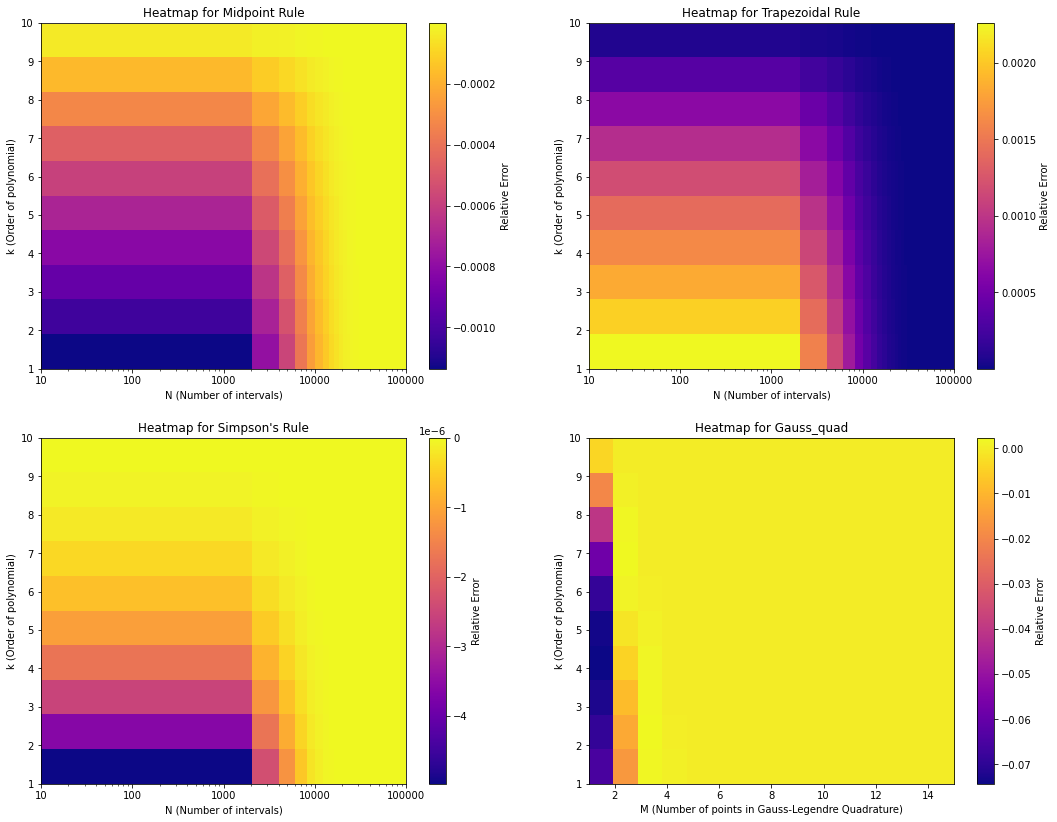

In [9]:
def fermi_dirac(x, k):
    return 1/(1+ np.exp(-k*x))

def true_dirac(a, b, k):
    return 1/k * (np.log(np.exp(k*b) + 1) - np.log(np.exp(k*a) + 1))

k_values = np.arange(1, 11)
N_values = np.logspace(1, 5, num=50, dtype=int)
M_values = np.arange(1, 16)

error_mid = np.zeros((len(k_values), len(N_values)))
error_trap = np.zeros((len(k_values), len(N_values)))
error_simp = np.zeros((len(k_values), len(N_values)))
error_gauss_quad = np.zeros((len(k_values), len(M_values)))

for i, k in enumerate(k_values):
    for j, N in enumerate(N_values):
        function_integrate = lambda x: fermi_dirac(x, k)
        quadrature = Quad_(function_integrate, N, 0, 1)
        
        approx_mid = quadrature.mid_quad()
        true_value = true_dirac(0, 1, k)
        
        error_mid[i, j] = error(true_value, approx_mid)
        
        approx_trap = quadrature.trapz_quad()
        error_trap[i, j] = error(true_value, approx_trap)
        
        approx_simp = quadrature.simpson_quad()
        error_simp[i, j] = error(true_value, approx_simp)
        
    for j, M in enumerate(M_values):
        quadrature = Gauss_Quad_(function_integrate, N, 0, 1, M)
        approx_gauss_quad = quadrature.gauss_quad()
        error_gauss_quad[i, j] = error(true_value, approx_gauss_quad)


plt.figure(figsize=(18, 14))

plt.subplot(2, 2, 1)
plt.imshow(error_mid, extent=[10, 10**5, 1, 10], aspect='auto', cmap='plasma')
plt.colorbar(label='Relative Error')
plt.xlabel('N (Number of intervals)')
plt.ylabel('k (Order of polynomial)')
plt.title('Heatmap for Midpoint Rule')
plt.xscale('log')
plt.xticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'])

plt.subplot(2, 2, 2)
plt.imshow(error_trap, extent=[10, 10**5, 1, 10], aspect='auto', cmap='plasma')
plt.colorbar(label='Relative Error')
plt.xlabel('N (Number of intervals)')
plt.ylabel('k (Order of polynomial)')
plt.title('Heatmap for Trapezoidal Rule')
plt.xscale('log')
plt.xticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'])

plt.subplot(2, 2, 3)
plt.imshow(error_simp, extent=[10, 10**5, 1, 10], aspect='auto', cmap='plasma')
plt.colorbar(label='Relative Error')
plt.xlabel('N (Number of intervals)')
plt.ylabel('k (Order of polynomial)')
plt.title("Heatmap for Simpson's Rule")
plt.xscale('log')
plt.xticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'])

plt.subplot(2, 2, 4)
plt.imshow(error_gauss_quad, extent=[1, 15, 1, 10], aspect='auto', cmap='plasma')
plt.colorbar(label='Relative Error')
plt.xlabel('M (Number of points in Gauss-Legendre Quadrature)')
plt.ylabel('k (Order of polynomial)')
plt.title('Heatmap for Gauss_quad')

plt.show()

<div style="text-align: center;">
    <h2><strong> Harmonic Oscillator </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 1. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$


## A)
Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$, write a function that calculates the period for a given amplitude.

In [10]:
def V(x):
    'Potential'
    return x ** 4

def timep(x, a):
    'Define the function that needs to be integrated (integrand) to calculate time period'
    return 1 / np.sqrt(V(a) - V(x))

## B) 
Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'?

In [11]:
from scipy.integrate import fixed_quad

def T(a, N):
    integral, _ = fixed_quad(timep, 0, a, n=N, args=(a,))
    T = np.sqrt(8) * integral
    return T

def estimated_error(a, N):
    return np.abs(T(a, N) - T(a, 2 * N))

In [13]:
'Perform a binary search for the optimal N'
def binary_search_error(target, a, bounds, error_fn):
    lower_bound, upper_bound = bounds

    while upper_bound - lower_bound > 1:
        mid = (lower_bound + upper_bound) // 2
        error = error_fn(a, mid)

        if error < target:
            upper_bound = mid
        else:
            lower_bound = mid

    optimal_N = upper_bound
    final_error = error_fn(a, optimal_N)
    
    print('Optimal N:', optimal_N)
    print('Final error:', error_fn(a, optimal_N))
    
    return optimal_N, final_error

binary_search_error(1e-4, 2, (1000, 5000), estimated_error)

Optimal N: 3078
Final error: 9.998698141666651e-05


(3078, 9.998698141666651e-05)

## C) 
Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique)

In [14]:
from scipy.integrate import quad

def T_with_quad(a):
    integral, integral_err = quad(timep, 0, a, args=(a,), limit=7) # Using 7 subdivisions
    T, error = integral * np.sqrt(8), integral_err * np.sqrt(8) 
    return T, error

# Reaches 5e-6 error in 7 subdivisions
T, error = T_with_quad(2)
print('T:', T)
print('Error:', error)

T: 1.8540746772715795
Error: 5.009377494867687e-06


C:\Users\nguye\AppData\Local\Temp\ipykernel_26800\3598369647.py:4: IntegrationWarning: The maximum number of subdivisions (7) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, integral_err = quad(timep, 0, a, args=(a,), limit=7) # Using 7 subdivisions


 ## D) 
Calculate the time period by using the inbuilt romberg function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) for Romberg integration. 
A simplistic usage with romberg(func, 0, a), where a is the amplitude, will probably give error or 'nan'. Why? 

In [15]:
a=2
romberg(timep, 0, a - 1e-5, args=(a,))

C:\Users\nguye\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.934461e-02
  warnings.warn(


0.6792308780195018

## <font color="orange">Romberg will not work with simplistic usage because the integrand is 1/0 at the right endpoint.</font>

## E) 
Assume that we can tolerate the uncertainitiy of $10^{-5}$ in the position. Show and output of 'keyword' show = True for 'a = 2'. Use this to estimate error for divmax = 10.


In [16]:
romberg(timep, 0, a - 1e-5, args=(a,), show=True, divmax=10)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x0000021D2CE93040> from [0, 1.99999]

 Steps  StepSize   Results
     1  1.999990 56.151628 
     2  0.999995 28.334012 19.061473 
     4  0.499997 14.443434  9.813242  9.196693 
     8  0.249999  7.512401  5.202056  4.894644  4.826357 
    16  0.124999  4.057476  2.905835  2.752754  2.718755  2.710490 
    32  0.062500  2.337676  1.764410  1.688314  1.671419  1.667311  1.666292 
    64  0.031250  1.483252  1.198444  1.160713  1.152338  1.150303  1.149797  1.149671 
   128  0.015625  1.059931  0.918824  0.900183  0.896047  0.895042  0.894793  0.894730  0.894715 
   256  0.007812  0.851026  0.781392  0.772230  0.770199  0.769705  0.769582  0.769552  0.769544  0.769542 
   512  0.003906  0.748522  0.714354  0.709885  0.708895  0.708655  0.708595  0.708580  0.708577  0.708576  0.708575 
  1024  0.001953  0.698643  0.682017  0.679861  0.679385  0.679269  0.679240  0.679233  0.679231  0.679231  0.679231  0.679231 

The final res

0.6792308780195018

## <font color="orange">Error term for the Romberg's method is approximately h^(2k+2). In this case, it is (0.001953 ^ (2052)) or basically zero.</font>

## F)
 Change divmax to change the number of divisions. How does the accuracy change on going from 10 to 15 divisions.

In [17]:
romberg(timep, 0, a - 1e-5, args=(a,), show=True, divmax=15)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x0000021D2C6E2310> from [0, 1.99999]

 Steps  StepSize   Results
     1  1.999990 56.151628 
     2  0.999995 28.334012 19.061473 
     4  0.499997 14.443434  9.813242  9.196693 
     8  0.249999  7.512401  5.202056  4.894644  4.826357 
    16  0.124999  4.057476  2.905835  2.752754  2.718755  2.710490 
    32  0.062500  2.337676  1.764410  1.688314  1.671419  1.667311  1.666292 
    64  0.031250  1.483252  1.198444  1.160713  1.152338  1.150303  1.149797  1.149671 
   128  0.015625  1.059931  0.918824  0.900183  0.896047  0.895042  0.894793  0.894730  0.894715 
   256  0.007812  0.851026  0.781392  0.772230  0.770199  0.769705  0.769582  0.769552  0.769544  0.769542 
   512  0.003906  0.748522  0.714354  0.709885  0.708895  0.708655  0.708595  0.708580  0.708577  0.708576  0.708575 
  1024  0.001953  0.698643  0.682017  0.679861  0.679385  0.679269 

C:\Users\nguye\anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:849: AccuracyWarning: divmax (15) exceeded. Latest difference = 4.291932e-04
  warnings.warn(


 0.679240  0.679233  0.679231  0.679231  0.679231  0.679231 
  2048  0.000977  0.674669  0.666677  0.665654  0.665429  0.665374  0.665361  0.665357  0.665356  0.665356  0.665356  0.665356  0.665356 
  4096  0.000488  0.663354  0.659582  0.659109  0.659005  0.658980  0.658974  0.658972  0.658972  0.658972  0.658972  0.658972  0.658972  0.658972 
  8192  0.000244  0.658159  0.656427  0.656217  0.656171  0.656160  0.656157  0.656157  0.656156  0.656156  0.656156  0.656156  0.656156  0.656156  0.656156 
 16384  0.000122  0.655871  0.655109  0.655021  0.655002  0.654997  0.654996  0.654996  0.654996  0.654996  0.654996  0.654996  0.654996  0.654996  0.654996  0.654996 
 32768  0.000061  0.654925  0.654609  0.654576  0.654569  0.654567  0.654567  0.654567  0.654567  0.654567  0.654567  0.654567  0.654567  0.654567  0.654567  0.654567  0.654567 

The final result is 0.6545665595504017 after 32769 function evaluations.


0.6545665595504017

## <font color="orange">Error is now (0.000061) ^ (65538). So relatively, a lot better but still basically zero.</font>

## G) 
Use the function to make a graph of the period for amplitude ranging from a=0 to a=2.

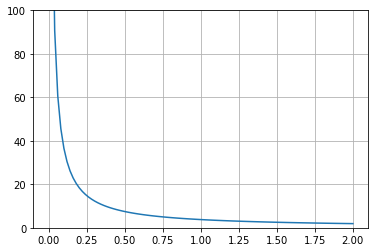

In [18]:
import warnings
warnings.filterwarnings("ignore")

a_space = np.linspace(2e-5, 2, 100)

integral_values = np.sqrt(8) * np.array([romberg(timep, 0, a - 1e-5, args=(a,)) for a in a_space])

plt.plot(a_space, integral_values)
plt.ylim(0, 100)
plt.grid()
plt.show()

<div style="text-align: center;">
    <h2><strong> Black Body Radiation </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 2. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total rate at which energy is radiated by a black body per unit area over all frequencies is 

$$ W = \frac{2 \pi k_B^4T^4}{c^2 {h}^3} \int _0^\infty \frac{x^3}{e^x -1} dx $$


## A) 
Write a function to to evaluate the integral in this expression. You will need to change the variables to go from an infinite range to a finite range. What is the change of variable and new functional form? The variable to go from range 0 to $\infty$ to a finite range of is 

$$ z = \frac{x}{1+x} $$
or equivalently
$$ x = \frac{z}{1-z} $$


## New range is (0, 1)

In [19]:
#Constants
k = 1.38064852e-23 
h = 6.626e-34
pi= np.pi
c = 3e8
hb = h /2/pi
prefactor = k**4/c**2/hb**3/4/pi**2 
#True value
stfconst = 5.670367e-8

def blackbody_var(z):
    'Blackbody spectrum after change of variables'
    x = z / (1 - z)
    return x ** 3 / (np.exp(x) - 1)

## B) 
According to Stefan's law, the total energy given off by a black-body per unit area per second is given by 
$$ W = \sigma T^4 $$. Use the integral to calculate the value of Stefan Boltzmann constant $\sigma$. Use 'fixed_quad' function to do the integral.   


In [20]:
integral, _ = fixed_quad(blackbody_var, 0, 1)
prefactor * integral

4.466198817245243e-09

## C) 
Inbuilt 'quad' function can support an infinite range for integration. Write another function to do the integration from 0 to $\infty$ and compare your answer.

In [21]:
def blackbody_var_x(x):
    return x ** 3 / (np.exp(x) - 1)

integral, _ = quad(blackbody_var_x, 0, np.inf)
prefactor * integral

5.662703503454044e-08

<div style="text-align: center;">
    <h2><strong> Planetary Orbit Integration </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 4. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


One of the great achievements in the history of science was the discovery of the laws of J. Kepler, based on many precise measurements of the positions of Mars by Tycho Brahe and himself. The planets move in elliptic orbits with the sun at one of the foci (Kepler’s first law).

Newton (Principia 1687) then explained this motion by his general law of gravitational attraction (proportional to $1/r^2$) and the relation between forces and acceleration. This then opened the way for treating arbitrary celestial motions by solving differential equations.


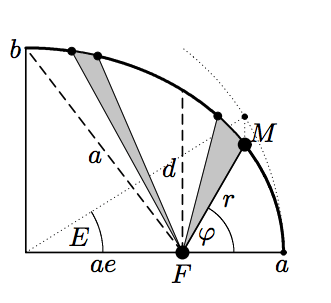


Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.




## A) 
 Q1. Using 400000 steps, use the explicit Euler method (Let $f(q) = \frac{dq}{dt}$. Then, $q(t+\Delta t) = \Delta t \cdot f(q)$ for small $\Delta t$) and plot the orbit of the planet. Assume $e = 0.6$ and integrate to a final time of $T_f = 200$.
 
 $$ q_{n+1} = q_n + \Delta t \cdot \dot{q_n} $$
$$ \dot{q}_{n+1} = p_{n+1} = p_n + \Delta t \cdot \dot{p_n} $$

In [22]:
def q1_d2(q1, q2):
    return -(q1 / (q1 ** 2 + q2 ** 2) ** (3/2))

def q2_d2(q1, q2):
    return -(q2 / (q1 ** 2 + q2 ** 2) ** (3/2))

In [23]:
e = 0.6
N = 400000
T_f = 200
delta_t = T_f / N

q1_i = 1 - e
q2_i = 0
q1_d1_i = 0
q2_d1_i = np.sqrt((1 + e) / (1 - e))

In [24]:
q1_values_exp_eul = [1-e]
q2_values_exp_eul = [0]

q1 = q1_i
q2 = q2_i
q1_d1 = q1_d1_i
q2_d1 = q2_d1_i

for i in range(N):    
    q1_next = q1 + delta_t * q1_d1
    q2_next = q2 + delta_t * q2_d1
    
    q1_d1_next = q1_d1 + delta_t * q1_d2(q1, q2)
    q2_d1_next = q2_d1 + delta_t * q2_d2(q1, q2)
    
    q1, q2, q1_d1, q2_d1 = q1_next, q2_next, q1_d1_next, q2_d1_next
    
    q1_values_exp_eul.append(q1)
    q2_values_exp_eul.append(q2)

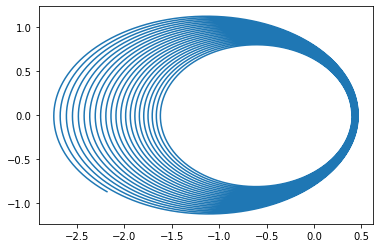

In [25]:
plt.plot(q1_values_exp_eul, q2_values_exp_eul)
plt.show()

## B) 
Using 400000 steps, use the symplectic Euler method. 

$$ p_{n+1} = p_n - \Delta t H_q(p_{n+1}, q_n) $$
$$ q_{n+1} = q_n + \Delta t H_p(p_{n+1}, q_n) $$
or
$$ q_{n+1} = q_n + \Delta t H_p(p_n, q_{n+1}) $$
$$ p_{n+1} = p_n - \Delta t H_p(p_n, q_{n+1}) $$
where $H_p$ and $H_q$ denote the column vectors of partial derivatives of the Hamiltonian with respect to $p$ and $q$, respectively. i.e. $H_{p_1} = p_1, H_{q_1} = \frac{q_1}{(q_1^2 + q_2^2)^{3/2}}, H_{p_2} = p_2, H_{q_2} = \frac{q_2}{(q_1^2 + q_2^2)^{3/2}}$. 
 
 
Again plot the orbit of the planet. Compare your results in A) and B) by plotting both solutions in the same figure. 

In [26]:
def H_q1(q1, q2):
    return q1 / ((q1 ** 2 + q2 ** 2) ** (3/2))

def H_q2(q1, q2):
    return H_q1(q2, q1)

In [27]:
q1_values_sym_eul = [1-e]
q2_values_sym_eul = [0]

q1 = q1_i
q2 = q2_i

p1 = q1_d1_i
p2 = q2_d1_i

for i in range(N):    
    p1_next = p1 - delta_t * H_q1(q1, q2)
    p2_next = p2 - delta_t * H_q2(q1, q2)
    
    q1_next = q1 + delta_t * p1_next
    q2_next = q2 + delta_t * p2_next
    
    q1, q2, p1, p2 = q1_next, q2_next, p1_next, p2_next
    
    q1_values_sym_eul.append(q1)
    q2_values_sym_eul.append(q2)

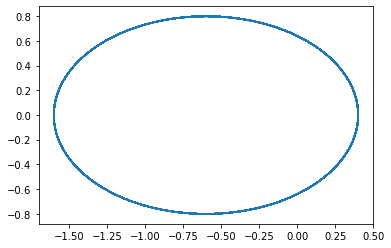

In [28]:
plt.plot(q1_values_sym_eul, q2_values_sym_eul)
plt.show()

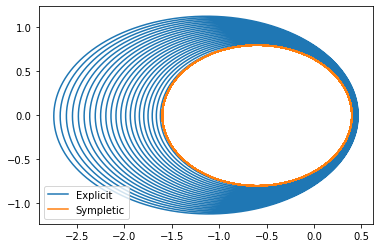

In [29]:
plt.plot(q1_values_exp_eul, q2_values_exp_eul, label="Explicit")
plt.plot(q1_values_sym_eul, q2_values_sym_eul, label="Sympletic")
plt.legend()
plt.show()